In [1]:
import sklearn
from sklearn import tree
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import  display

In [3]:
from IPython.display import  HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [4]:
data = pd.read_csv( 'D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\cats.csv', encoding='utf-8')

In [21]:
data

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [27]:
data = data.rename (columns = {'Лазает по деревьям' : 'Лазает'})

In [28]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [29]:
clf

DecisionTreeClassifier(criterion='entropy')

In [33]:
X = data[['Шерстист']] # используем для обучения данные (переменная с фичами (ДФ))
y = data.Вид # предсказываем

In [34]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

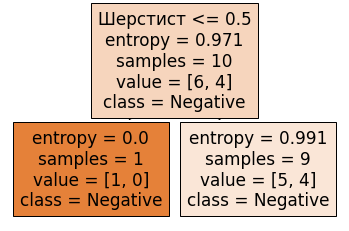

In [35]:
tree.plot_tree(clf, feature_names=list(X), class_names=['Negative', 'Positive'],   filled=True);

In [37]:
E(Y) = - 4/10 * Log(4/10) - 6/10 * Log(6/10)

E(Y/X)шерстит = 1/10 * 0 (Е=0) + 9/10 * Е (0,99)

E(Y/X) гавкает = 5/10 * 0 (Е=0) + 5/10 * Е (0,72)

Е(Y/X) лазает = 0 (Е в обоих случаях равна нулю) или 4/10 * 0 + 6/10 * 0ъ

NameError: name 'Log' is not defined

In [45]:
# Вспомогательная функция для рассчета доли переданного значения в переданном столбце переданного датафрейма
def calc_sel_ratio(data, col_input, val_input):
    return data[data[col_input] == val_input][col_input].count() / data.shape[0]

# Вспомогательная функция для рассчета Pi
def calc_pi(data, col_input, val_input, col_output, val_output):
    if col_input != col_output:
        sel_df = data[data[col_input] == val_input]
        return calc_sel_ratio(sel_df, col_output, val_output)
    else:
        return calc_sel_ratio(data, col_output, val_output)

# Функция для рассчета энтропии
def calc_entropy(data, col_input, val_input, col_output):
    entropy = 0
    vals_output = data[col_output].unique()
    for val_output in vals_output:
        pi = calc_pi(data, col_input, val_input, col_output, val_output)
        entropy += - (pi * (math.log(pi, 2) if pi != 0 else 0))
    return entropy

# Функция для рассчета IG
def calc_ig(data, col_input, col_output):
    vals_input = data[col_input].unique()
    self_entropy = calc_entropy(data, col_output, None, col_output)
    childs_entropy =  0
    for val_input in vals_input:
        childs_entropy += calc_sel_ratio(data, col_input, val_input) * calc_entropy(data, col_input, val_input, col_output)
    ig = self_entropy - childs_entropy
    return ig

In [47]:
#Решение....Вау!
import math as m
def IG(start, first, second, value1, value2):
    return start - first * value1 - second * value2
a = IG(0.971, 0, 0.991, 0.1, 0.9)
b = IG(0.971, 0, 0.722, 0.5, 0.5)
c = IG(0.971, 0, 0, 0.4, 0.6)
print(a, b, c)

0.07909999999999995 0.61 0.971


In [54]:
import math as m
E_sh_sob=(1/1)*m.log2((1/1)) - 0
E_sh_kot=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_sob=0 - (5/5)*m.log2((5/5))
E_gav_kot=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_sob=0 - (6/6)*m.log2((6/6))
E_laz_kot=-(4/4)*m.log2((4/4)) - 0

E_zag = -(4/10)*m.log2(4/10)-(6/10)*m.log2(6/10)
IG_sh = E_zag-((9/10)*E_sh_kot+(1/10)*E_sh_sob)
IG_gav = E_zag-((5/10)*E_gav_kot+(5/10)*E_gav_sob)
IG_laz = E_zag-((4/10)*E_laz_kot+(6/10)*E_laz_sob)
print(round(E_zag, 2))
print(round(IG_sh, 2))
print(round(IG_gav, 2))
print(round(IG_laz,2))

0.97
0.08
0.61
0.97


In [57]:
import pandas as pd
from scipy.stats import entropy


def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)


def ig(data, feature):
  ent0 = ent(data[data[feature] == 0])
  ent1 = ent(data[data[feature] == 1])
  n = len(data)
  n0 = len(data[data[feature] == 0])
  n1 = len(data[data[feature] == 1])
  return ent(data) - ent0 * n0 / n - ent1 * n1 / n


print('IG по шертистости: ', ig(data, 'Шерстист'))
print('IG по голосу: ', ig(data, 'Гавкает'))
print('IG по деревьям: ', ig(data, 'Лазает'))

IG по шертистости:  0.07898214060026876
IG по голосу:  0.6099865470109876
IG по деревьям:  0.9709505944546688
